## Умова завдання
17. Знайти найменший додатнiй корiнь нелiнiйного рiвняння x^3 − 3x^2 − 17x + 22 + sin x = 0 за допомогою iнтерполяцiї
 (використати iнтерполяцiйний полiном Ньютона, побудованого за
1) 10 рiвновiддаленими вузлами 
2) 10 вузлами, якi є нулями полiному Чебишова).

In [538]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [539]:
equation = "x^3 - 3*x^2 - 17 * x + 22 + sin(x) = 0"
function = "x^3 - 3*x^2 - 17 * x + 22 + sin(x)"
f_x = lambda x: x**3 - 3*x**2 -17 * x + 22 + np.sin(x)
m = 10
n = m - 1

In [540]:
def has_root(f, a, b) -> bool:
    if not callable(f):
        raise ValueError("f must be a callable function.")
    
    if a >= b:
        raise ValueError("The interval must satisfy 'a < b'.")
    
    fa = f(a)
    fb = f(b)
    
    if fa * fb < 0:
        return True
    else:
        return False

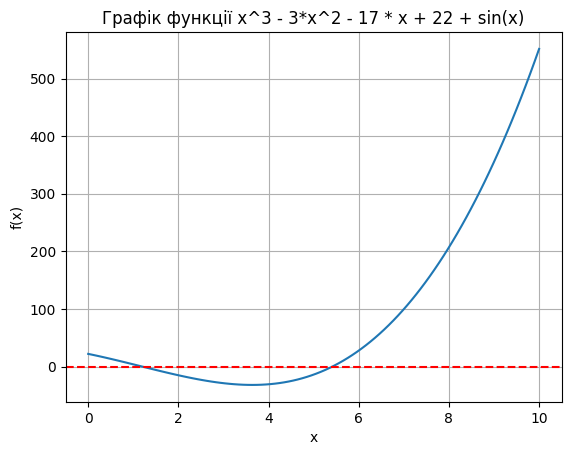

In [541]:
# plot the function
x = np.linspace(0, 10, 100)
y = f_x(x)
plt.plot(x, y)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Графік функції ' + function)
plt.grid(True)
plt.show()

In [542]:
# check if the function has a root in the interval [0, 2]
if has_root(f_x, 0, 2):
    print("The function has a root in the interval [0, 2].")
else:
    print("The function has no root in the interval [0, 2].")

interval = [0, 2]

The function has a root in the interval [0, 2].


## 1) 10 рiвновiддаленими вузлами

The interpolation nodes are:
[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


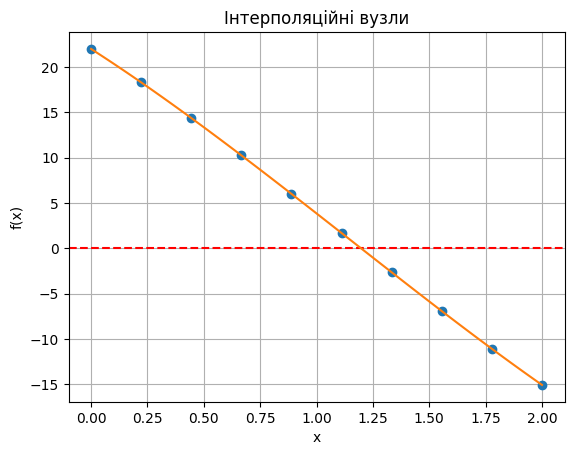

In [543]:
# get the interpolation nodes
x_nodes = np.linspace(interval[0], interval[1], m)

print("The interpolation nodes are:")
print(x_nodes)

# get the function values at the interpolation nodes
y_nodes = f_x(x_nodes)

# plot the interpolation nodes
plt.plot(x_nodes, y_nodes, 'o')
plt.axhline(0, color='red', linestyle='--')

# plot the function
x = np.linspace(0, 2, 100)
y = f_x(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Інтерполяційні вузли')
plt.grid(True)
plt.show()


In [544]:
# get the divided differences table
def divided_differences(x_values, y_values):
    n = len(x_values)
    divided_diff_table = np.zeros((n, n))
    
    for i in range(n): 
        divided_diff_table[i, 0] = y_values[i] 

    for j in range(1, n): 
        for i in range(n - j): 
            divided_diff_table[i][j] = (divided_diff_table[i + 1][j - 1] - divided_diff_table[i][j - 1]) / (x_values[i + j] - x_values[i])

    return divided_diff_table

In [545]:
# get the Newton polynomial
def newton_polynomial(x_values, y_values, x):
    # get the divided differences table
    divided_diff_table = divided_differences(x_values, y_values)

    # print the divided differences table
    print("Divided differences table:")
    for i in range(m):
        print("x", i, end = "\t")
        for j in range(m - i):
            print("%.4f"%divided_diff_table[i, j], end = "\t")
        print("")

    n = len(x_values)
    p = y_values[0]
    f = 1

    for i in range(1, n):
        f = f * (x - x_values[i - 1])
        p = p + f * divided_diff_table[0, i]

    return p

def Polynomial(x_nodes, divided_difference_table):
    p_function = ""
    for i in range(m):
        p_function += "%.4f"%divided_difference_table[0, i]
        for j in range(i):
            p_function += "*(x - %.4f)"%x_nodes[j]
        if i < m - 1:
            p_function += " + "

    return sp.simplify(p_function)

In [546]:
divided_difference_table = divided_differences(x_nodes, y_nodes)

# get the Newton polynomial
p_simplified = Polynomial(x_nodes, divided_difference_table)

print("Newton polynomial:")
print(p_simplified)

Newton polynomial:
-0.0001*x**7 - 0.00033334*x**6 + 0.008802468642*x**5 - 0.000306795883786001*x**4 + 0.833444831253257*x**3 - 2.99998822196692*x**2 - 16.000070054621*x + 22.0


Divided differences table:
x 0	22.0000	-16.6255	-2.4431	0.8435	0.0178	0.0070	-0.0008	-0.0001	0.0000	0.0000	
x 1	18.3054	-17.7113	-1.8808	0.8593	0.0256	0.0059	-0.0011	-0.0001	0.0000	
x 2	14.3696	-18.5472	-1.3079	0.8820	0.0321	0.0045	-0.0012	-0.0001	
x 3	10.2480	-19.1285	-0.7199	0.9105	0.0370	0.0028	-0.0013	
x 4	5.9972	-19.4485	-0.1129	0.9434	0.0402	0.0010	
x 5	1.6753	-19.4987	0.5160	0.9791	0.0413	
x 6	-2.6577	-19.2693	1.1688	1.0159	
x 7	-6.9398	-18.7498	1.8460	
x 8	-11.1064	-17.9294	
x 9	-15.0907	


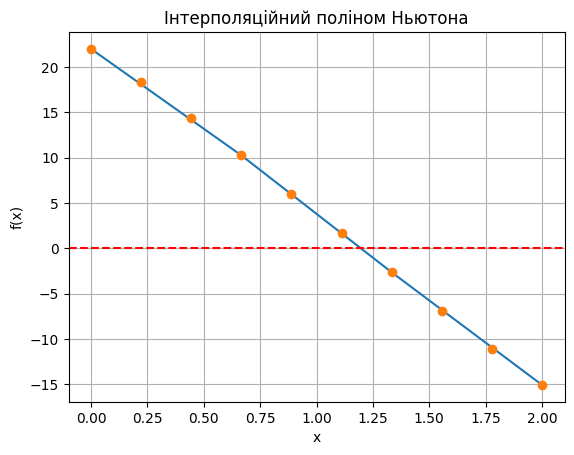

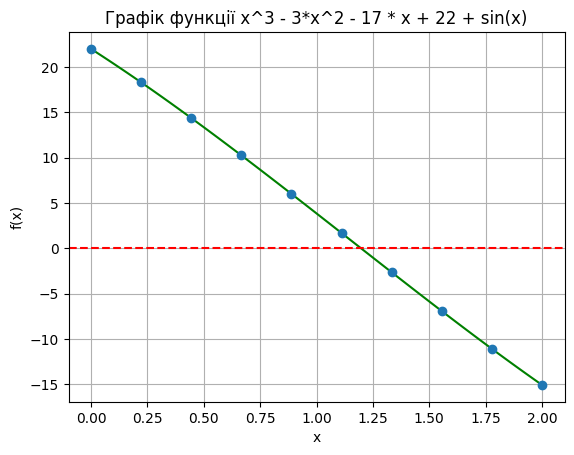

In [547]:
p_x = lambda x: newton_polynomial(x_nodes, y_nodes, x)

# plot the Newton polynomial
x = np.linspace(0, 2, 4)
y = p_x(x)
plt.plot(x, y)

# plot the interpolation nodes
plt.plot(x_nodes, y_nodes, 'o')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('x')

plt.ylabel('f(x)')

plt.title('Iнтерполяційний поліном Ньютона')
plt.grid(True)
plt.show()

# plot the function
x = np.linspace(0, 2, 100)
y = f_x(x)
plt.plot(x, y, color='green')
plt.plot(x_nodes, y_nodes, 'o')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(0, color='red', linestyle='--')
plt.title('Графік функції ' + function)
plt.grid(True)
plt.show()

In [548]:
def dichotomy_method(f, a, b, epsilon=1e-6, max_iterations=10000):
    """
    Метод дихотомії для знаходження кореня рівняння f(x) = 0 на відрізку [a, b].

    :param f: Функція, для якої шукаємо корінь.
    :param a: Ліва границя відрізка.
    :param b: Права границя відрізка.
    :param epsilon: Точність, яку досягаємо.
    :param max_iterations: Максимальна кількість ітерацій.
    :return: Значення кореня та кількість ітерацій.
    """
    if f(a) * f(b) > 0:
        raise ValueError("Функція має однаковий знак на границях відрізка.")

    iteration = 0
    while (b - a) / 2 > epsilon and iteration < max_iterations:
        c = (a + b) / 2
        if f(c) == 0:
            return c, iteration
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iteration += 1

    root = (a + b) / 2
    return root, iteration

In [549]:
# find the root of the Newton polynomial
y0 = 0

# get the root of the Newton polynomial
x0, iterations = dichotomy_method(p_x, 0, 2, 1e-6)

print("x0 =", x0)

Divided differences table:
x 0	22.0000	-16.6255	-2.4431	0.8435	0.0178	0.0070	-0.0008	-0.0001	0.0000	0.0000	
x 1	18.3054	-17.7113	-1.8808	0.8593	0.0256	0.0059	-0.0011	-0.0001	0.0000	
x 2	14.3696	-18.5472	-1.3079	0.8820	0.0321	0.0045	-0.0012	-0.0001	
x 3	10.2480	-19.1285	-0.7199	0.9105	0.0370	0.0028	-0.0013	
x 4	5.9972	-19.4485	-0.1129	0.9434	0.0402	0.0010	
x 5	1.6753	-19.4987	0.5160	0.9791	0.0413	
x 6	-2.6577	-19.2693	1.1688	1.0159	
x 7	-6.9398	-18.7498	1.8460	
x 8	-11.1064	-17.9294	
x 9	-15.0907	
Divided differences table:
x 0	22.0000	-16.6255	-2.4431	0.8435	0.0178	0.0070	-0.0008	-0.0001	0.0000	0.0000	
x 1	18.3054	-17.7113	-1.8808	0.8593	0.0256	0.0059	-0.0011	-0.0001	0.0000	
x 2	14.3696	-18.5472	-1.3079	0.8820	0.0321	0.0045	-0.0012	-0.0001	
x 3	10.2480	-19.1285	-0.7199	0.9105	0.0370	0.0028	-0.0013	
x 4	5.9972	-19.4485	-0.1129	0.9434	0.0402	0.0010	
x 5	1.6753	-19.4987	0.5160	0.9791	0.0413	
x 6	-2.6577	-19.2693	1.1688	1.0159	
x 7	-6.9398	-18.7498	1.8460	
x 8	-11.1064	-17.9294	
x 9	-15.09

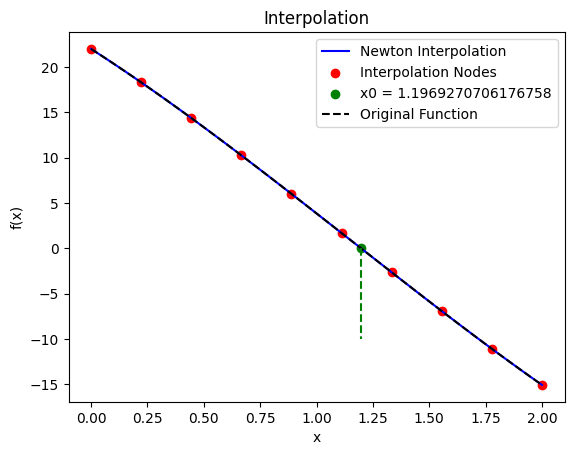

In [550]:
from sympy import lambdify, symbols


x_interp = np.linspace(min(x_nodes), max(x_nodes), 100) 
y_interp = [lambdify(symbols('x'), p_simplified, 'numpy')(x) for x in x_interp] 
y_function = [f_x(x) for x in x_interp] 
plt.plot(x_interp, y_interp, label=f'{"Newton"} Interpolation', color='blue') 
plt.scatter(x_nodes, y_nodes, color='red', label='Interpolation Nodes') 
plt.scatter(x0, lambdify(symbols('x'), p_simplified, 'numpy')(x0), color='green', label=f'x0 = {x0}') 
plt.plot(x_interp, y_function, label='Original Function', color='black', linestyle='--') 
 
 # Робимо пунктирну лінію вниз від зеленої точки x0
plt.plot([x0, x0], [lambdify(symbols('x'), p_simplified, 'numpy')(x0), -10], linestyle='--', color='green') 
plt.legend() 
plt.title('Interpolation') 
plt.xlabel('x') 
plt.ylabel('f(x)') 
plt.show() 

## 2) 10 вузлами, якi є нулями полiному Чебишова)

In [551]:
chebyshov_nodes = (interval[0] + interval[1]) / 2 + (interval[1] - interval[0]) / 2 * np.cos((2 * np.arange(0, m) + 1) / (2 * m) * np.pi)
print("Chebyshov nodes:")
print(chebyshov_nodes)

Chebyshov nodes:
[1.98768834 1.89100652 1.70710678 1.4539905  1.15643447 0.84356553
 0.5460095  0.29289322 0.10899348 0.01231166]


In [552]:
y_nodes_сhebyshov = f_x(chebyshov_nodes)
print("The function values at the Chebyshov nodes:")
print(y_nodes_сhebyshov)

The function values at the Chebyshov nodes:
[-14.87589708 -13.1635977   -9.79785813  -4.99305325   0.79051235
   6.87187932  12.50552028  17.07730567  20.22154478  21.80256027]


Newton polynomial:
14.7035*x**9 - 133.07304695*x**8 + 515.297796421705*x**7 - 1115.14015323286*x**6 + 1479.02371992756*x**5 - 1241.48015364714*x**4 + 660.764028641292*x**3 - 221.216522695388*x**2 + 60.7355614271902*x - 15.7730662685759
Divided differences table:
x 0	-14.8759	-17.7107	2.1077	1.0312	0.0413	0.0005	-0.0013	-0.0001	0.0000	0.0000	
x 1	-13.1636	-18.3020	1.5573	0.9969	0.0407	0.0025	-0.0012	-0.0001	0.0000	
x 2	-9.7979	-18.9826	0.8250	0.9543	0.0373	0.0044	-0.0010	-0.0001	
x 3	-4.9931	-19.4369	0.0009	0.9110	0.0311	0.0061	-0.0008	
x 4	0.7905	-19.4374	-0.8263	0.8749	0.0229	0.0073	
x 5	6.8719	-18.9330	-1.5818	0.8509	0.0146	
x 6	12.5055	-18.0620	-2.2068	0.8388	
x 7	17.0773	-17.0976	-2.6545	
x 8	20.2215	-16.3528	
x 9	21.8026	


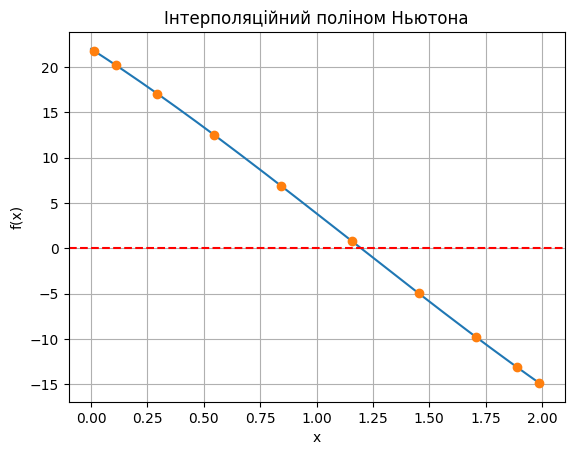

In [553]:
divided_difference_table_с = divided_differences(chebyshov_nodes, y_nodes)
p_c_simplified = Polynomial(chebyshov_nodes, divided_difference_table_с)
print("Newton polynomial:")
print(p_c_simplified)

p_c = lambda x: newton_polynomial(chebyshov_nodes, y_nodes_сhebyshov, x)

# plot the Newton polynomial
x = np.linspace(0, 2, 1000)
y = p_c(x)
plt.plot(x, y)

# plot the interpolation nodes
plt.plot(chebyshov_nodes, y_nodes_сhebyshov, 'o')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('x')

plt.ylabel('f(x)')
plt.title('Iнтерполяційний поліном Ньютона')
plt.grid(True)
plt.show()

In [554]:
# find the root of the Newton polynomial
y0 = 0

# get the root of the Newton polynomial
x0, iterations = dichotomy_method(p_c, 0, 2, 1e-6)

print("x0 =", x0)

Divided differences table:
x 0	-14.8759	-17.7107	2.1077	1.0312	0.0413	0.0005	-0.0013	-0.0001	0.0000	0.0000	
x 1	-13.1636	-18.3020	1.5573	0.9969	0.0407	0.0025	-0.0012	-0.0001	0.0000	
x 2	-9.7979	-18.9826	0.8250	0.9543	0.0373	0.0044	-0.0010	-0.0001	
x 3	-4.9931	-19.4369	0.0009	0.9110	0.0311	0.0061	-0.0008	
x 4	0.7905	-19.4374	-0.8263	0.8749	0.0229	0.0073	
x 5	6.8719	-18.9330	-1.5818	0.8509	0.0146	
x 6	12.5055	-18.0620	-2.2068	0.8388	
x 7	17.0773	-17.0976	-2.6545	
x 8	20.2215	-16.3528	
x 9	21.8026	
Divided differences table:
x 0	-14.8759	-17.7107	2.1077	1.0312	0.0413	0.0005	-0.0013	-0.0001	0.0000	0.0000	
x 1	-13.1636	-18.3020	1.5573	0.9969	0.0407	0.0025	-0.0012	-0.0001	0.0000	
x 2	-9.7979	-18.9826	0.8250	0.9543	0.0373	0.0044	-0.0010	-0.0001	
x 3	-4.9931	-19.4369	0.0009	0.9110	0.0311	0.0061	-0.0008	
x 4	0.7905	-19.4374	-0.8263	0.8749	0.0229	0.0073	
x 5	6.8719	-18.9330	-1.5818	0.8509	0.0146	
x 6	12.5055	-18.0620	-2.2068	0.8388	
x 7	17.0773	-17.0976	-2.6545	
x 8	20.2215	-16.3528	
x 9	21.8026

In [ ]:
x_interp = np.linspace(min(chebyshov_nodes), max(chebyshov_nodes), 100) 
y_interp = [lambdify(symbols('x'), p_c_simplified, 'numpy')(x) for x in x_interp] 
y_function = [f_x(x) for x in x_interp] 
plt.plot(x_interp, y_interp, label=f'{"Newton"} Interpolation', color='blue') 
plt.scatter(chebyshov_nodes, y_nodes_сhebyshov, color='red', label='Chebyshov Interpolation Nodes') 
plt.scatter(x0, lambdify(symbols('x'), p_c_simplified, 'numpy')(x0), color='green', label=f'x0 = {x0}') 
plt.plot(x_interp, y_function, label='Original Function', color='black', linestyle='--') 
 
 # Робимо пунктирну лінію вниз від зеленої точки x0
plt.plot([x0, x0], [lambdify(symbols('x'), p_c_simplified, 'numpy')(x0), -10], linestyle='--', color='green') 
plt.legend() 
plt.title('Interpolation') 
plt.xlabel('x') 
plt.ylabel('f(x)') 
plt.show() 